In [20]:
# In this notebook we cover the following
# A. Edge Detection using Canny and Sobel and Laplachian
# B. Non Maxima Suppression
# C. Contours
# D. Edge Linking
# E. Calculate Gradient
# F. Blob Detection
# G. Lane Detection
# G. Cartoon

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def show(image, imgtxt = "Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(imgtxt)
    plt.show()

In [21]:
# Edge Algorithms
# Canny edge detection 
def edge_detection(im, METHOD="canny"):
    image = im.copy()
    if METHOD == "canny":
      # Apply Canny edge detection
      edges = cv2.Canny(image, 50, 150)
    elif METHOD == "Sobel" :
    # Apply Sobel edge detection in X and Y directions
      sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
      sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

      # Combine X and Y gradients
      edges = cv2.sqrt(np.square(sobel_x) + np.square(sobel_y))

      # Normalize and convert to uint8
      edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    elif "LAPLACIAN":

      # Apply Laplacian filter
      edges = cv2.Laplacian(image, cv2.CV_64F)

      # Convert to absolute value and normalize
      edges = np.absolute(edges)
      edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    return edges

In [22]:
# Non-maxima suppression
def non_maxima_suppression(im):
  image = im.copy()  
  # Apply non-maxima suppression
  thinned_edges = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
  return thinned_edges

In [23]:
# Contours
def find_contours(im):
  #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gim = im.copy()  
  _, binary_image = cv2.threshold(gim, 127, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  return contours, hierarchy

In [24]:
# Gradient
def compute_gradient(im):
  image = im.copy()  
  gim = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gx = cv2.Sobel(gim, cv2.CV_64F, 1, 0)
  gy = cv2.Sobel(gim, cv2.CV_64F, 0, 1)
  magnitude, direction = cv2.cartToPolar(gx, gy, angleInDegrees=True)
  return magnitude, direction

In [25]:
# Edge Linking
def edge_linking(im, edg):
    image = im.copy()  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    linesP = cv2.HoughLinesP(edg, rho=1, theta=np.pi / 180, threshold=175, minLineLength=100, maxLineGap=100)
    if linesP is not None:
          for i in range(0, len(linesP)):
              l = linesP[i][0]
              im = cv2.line(im, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv2.LINE_AA)
    return im

In [26]:
#Blob Detection
# Simple
def simple_blob_detection(image):
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  params = cv2.SimpleBlobDetector_Params()
  detector = cv2.SimpleBlobDetector_create(params)
  keypoints = detector.detect(gray_image)
  # Draw detected blobs as blue circles.
  im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  
  # Show keypoints
  show(im_with_keypoints)
  return keypoints

In [27]:
# MSER
def blob_detection(image):
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Create MSER detector
  mser = cv2.MSER_create()
  # Detect blobs
  regions,bounding_boxes = mser.detectRegions(gray_image)
  for box in bounding_boxes:
        x, y, w, h = box
        image = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 2550, 0), 1)
  show(image)      
  return bounding_boxes

In [28]:
# FAST
def fast_blob_detection(image):
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  fast = cv2.FastFeatureDetector_create()
  keypoints = fast.detect(gray_image, None)
  # Draw detected blobs as blue circles.
  im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  
  # Show keypoints
  show(im_with_keypoints)
  return keypoints

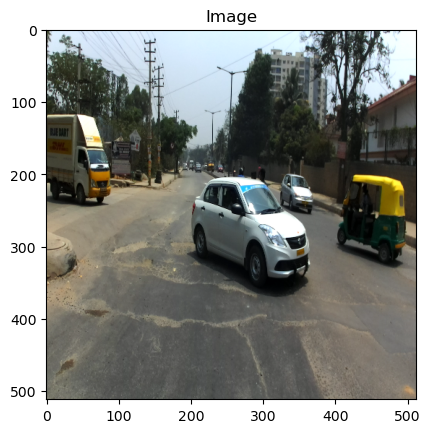

In [29]:
# Example usage
image = cv2.imread("./images/Image_50.png")
show(image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

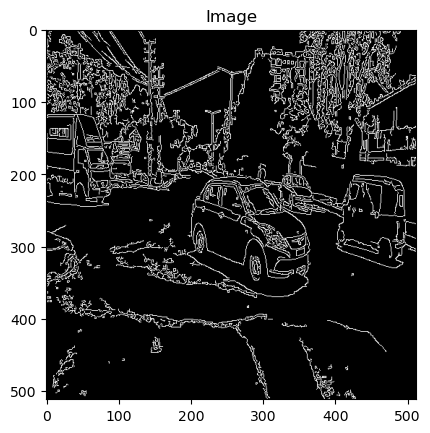

In [30]:
edges = edge_detection(gray_image)
show(edges)

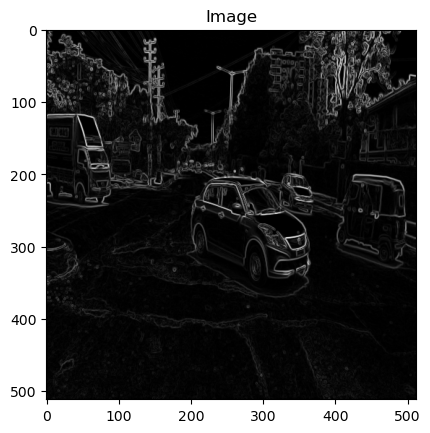

In [31]:
edges = edge_detection(gray_image,"Sobel")
show(edges)

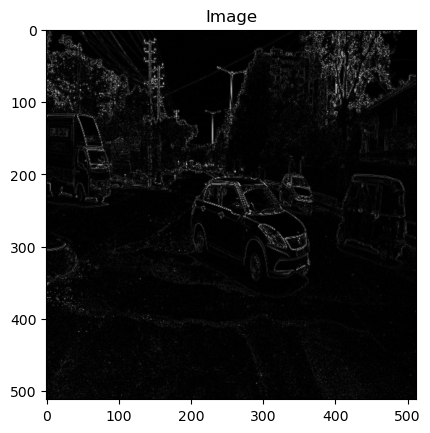

In [32]:

edges = edge_detection(gray_image,"Laplacian")
show(edges)

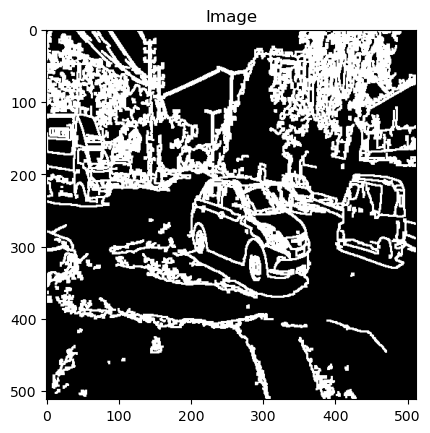

In [33]:
# Example usage : selects or highlights the imp edges 
edges = edge_detection(gray_image)
thinned_edges = non_maxima_suppression(edges)
show(thinned_edges)

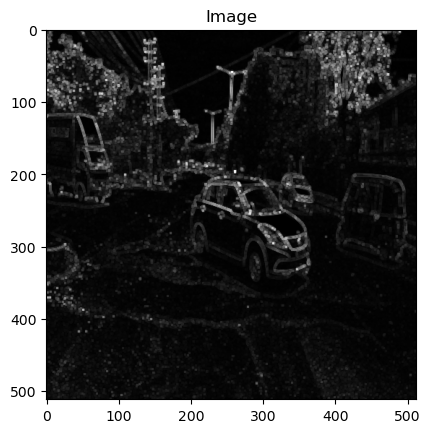

In [34]:
edges = edge_detection(gray_image,"Laplacian")
thinned_edges = non_maxima_suppression(edges)
show(thinned_edges)

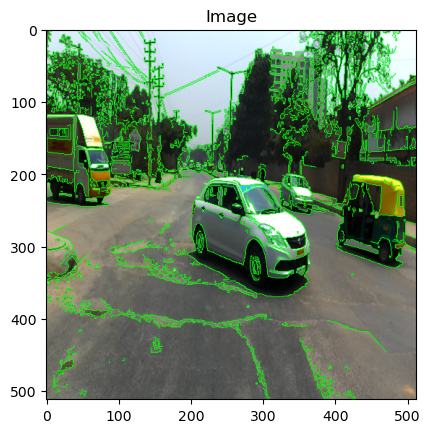

In [35]:
# Example usage for lane detection

# Canny edge detection
edges = edge_detection(gray_image)

# Find contours
contours, _ = find_contours(edges)
cv2.drawContours(image, contours, -1, (0,255,0), 1)

show(image)

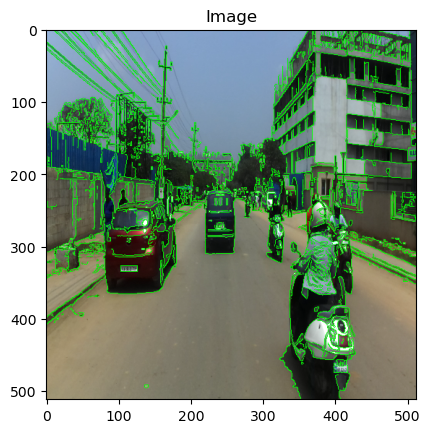

In [36]:
img = cv2.imread("./images/Image_107.png")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canny edge detection
edges1 = edge_detection(gray_img)

# Find contours
contours1, _ = find_contours(edges1)
cv2.drawContours(img, contours1, -1, (0,255,0), 1)

show(img)

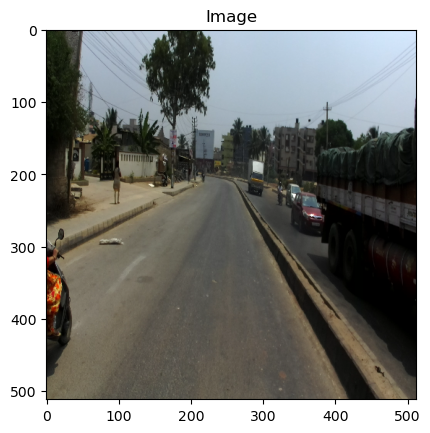

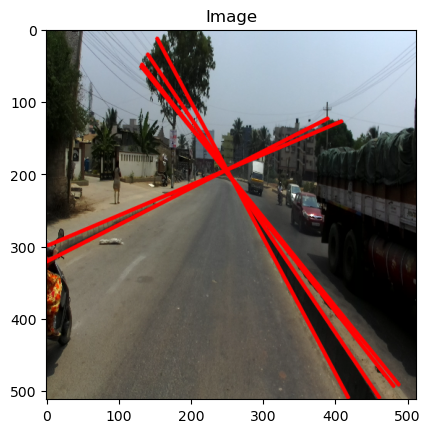

In [37]:
# Link edges
link_image = cv2.imread("./images/Image_39.png")
show(link_image)
link_edges = edge_detection(link_image)
link_contours, _ = find_contours(link_edges)
linked_edges = edge_linking(link_image,link_edges)
show(linked_edges)

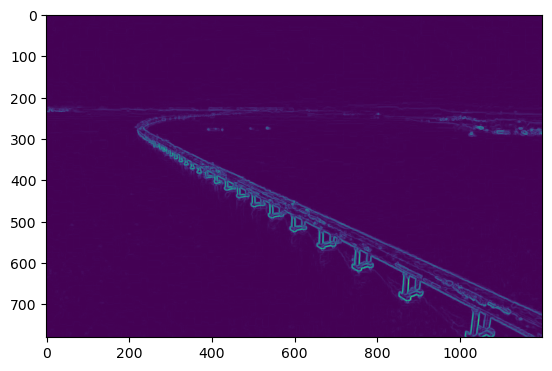

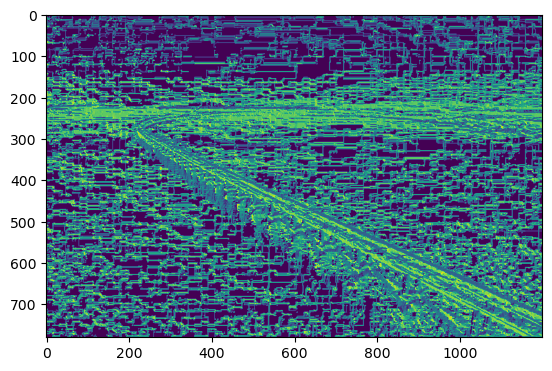

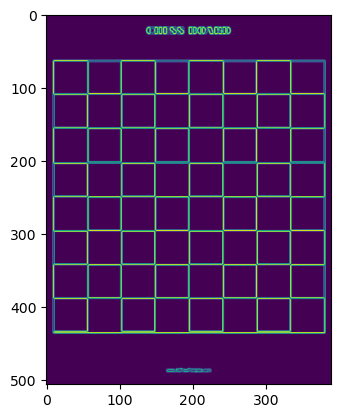

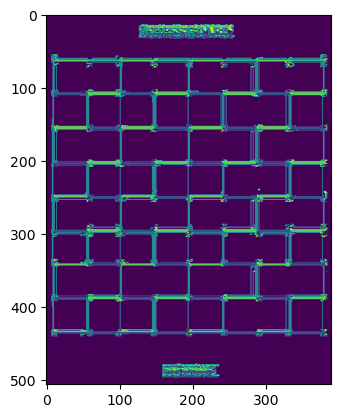

(<matplotlib.image.AxesImage at 0x1580661d0>, None)

In [38]:
# Calculate gradient
img = cv2.imread('./images/bridge.jpeg')
mag, dir = compute_gradient(img)
plt.imshow(mag),plt.show()
plt.imshow(dir),plt.show()

img = cv2.imread('./images/chess.jpg')
mag, dir = compute_gradient(img)
plt.imshow(mag),plt.show()
plt.imshow(dir),plt.show()



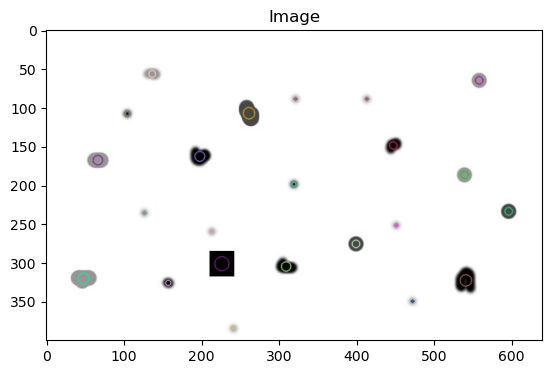

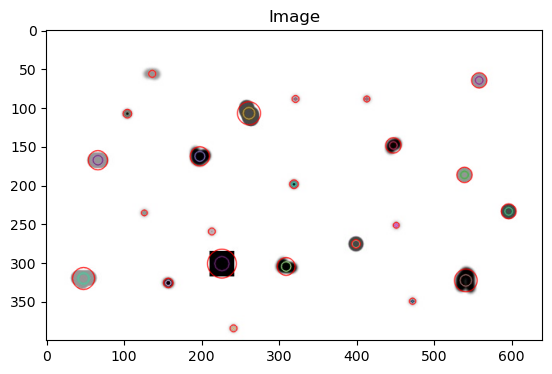

In [39]:
# Detect FAST blobs
image = cv2.imread('./images/blob1.jpeg')
show(image)
blobs = simple_blob_detection(image)


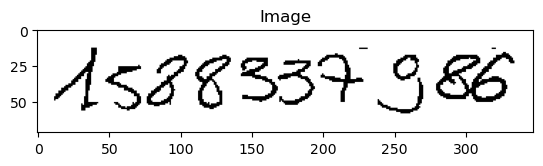

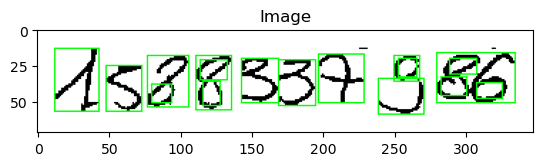

In [40]:
image = cv2.imread('./images/blob2.png')
show(image)
blobs = blob_detection(image)


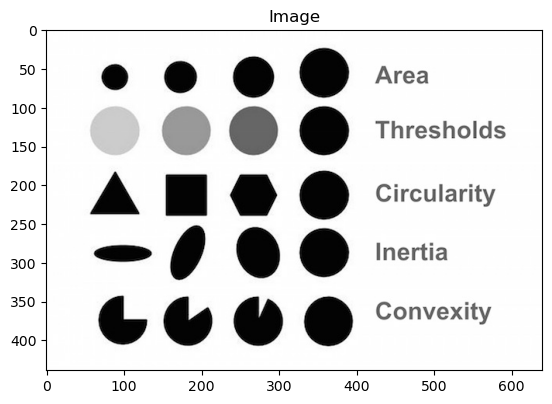

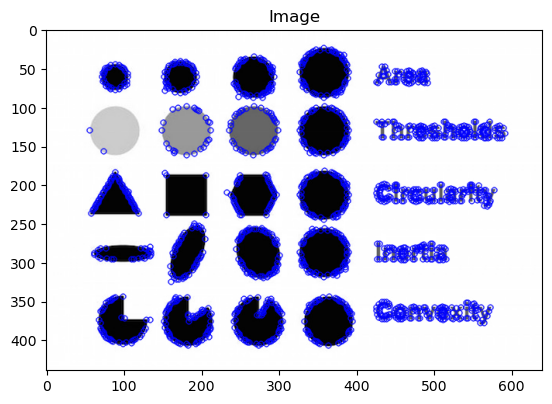

In [41]:
image = cv2.imread('./images/blob3.jpeg')
show(image)
blobs = fast_blob_detection(image)

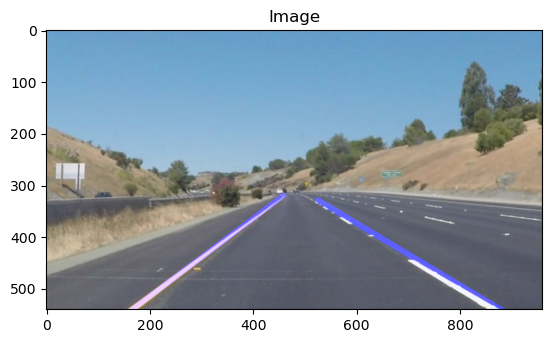

In [42]:
# Lane Detection
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):    
    right_slopes = []
    left_slopes = []
    leftx1=leftx2=lefty1=lefty2=rightx1=rightx2=righty1=righty2=0
    # Find the endpoints - the idea is to "smoothen" the line   
    # Now find the slope from the points. I can find this from the en points but the average performs better
 
    # Also added some region of interest / slope checks in here
 
    for line in lines:
        for x1,y1,x2,y2 in line:
           
            if (y2-y1)/(x2-x1) >= 0.5 and (y2-y1)/(x2-x1) < 1.7  :       
                right_slopes.append((y2-y1)/(x2-x1))                 
                if rightx1==0 and rightx2==0:
                # Initialize
                    rightx1 = x1
                    righty1 = y1
                    rightx2 = x2
                    righty2 = y2            
                # find the bottommost point    
                elif x1 < rightx1 and y1> righty1:  
                    rightx1 = x1
                    righty1 = y1
                # find the topmost point    
                elif x2 > rightx2  and y2 < rightx2:  
                    rightx2 = x2
                    righty2 = y2
    
            elif (y2-y1)/(x2-x1) <= -0.5 and (y2-y1)/(x2-x1) > -1.7  :
                left_slopes.append((y2-y1)/(x2-x1)) 
                if leftx1==0 and leftx2==0:
                # Initialize    
                    leftx1 = x1
                    lefty1 = y1
                    leftx2 = x2
                    lefty2 = y2            
                # find the bottommost point    
                elif x1 > leftx1 and y1 > lefty1: 
                    leftx1 = x1
                    lefty1 = y1
                # find the topmost point    
                elif x2 < leftx2 and y2 < lefty2:  
                    leftx2 = x2
                    lefty2 = y2

    right_slope = sum(right_slopes)/len(right_slopes)
    left_slope = sum(left_slopes)/len(left_slopes)

    # extrapolate where the points on the bottom and top edges
    # some are approximations using the bottom and topmost points
    righty1 = img.shape[1]
    rightx1 = int(rightx2 - (righty2-righty1)/right_slope)
    if rightx2 > 520:
        rightx2 = 525
        righty2= int(right_slope*(rightx2-rightx1)+righty1)
        #rightx2 = int( (righty2-righty1)/right_slope + rightx1)

    lefty1 = img.shape[1]
    leftx1 = int(leftx2 - (lefty2-lefty1)/left_slope)
    
    if leftx2 < 440:
        leftx2 = 445
        lefty2= int(left_slope*(leftx2-leftx1)+lefty1)   
        #leftx2 = int( (lefty2-lefty1)/left_slope + leftx1)
            
    # draw the lines
    cv2.line(img, (leftx1, lefty1), (leftx2, lefty2), color, thickness)
    cv2.line(img, (rightx1,righty1), (rightx2, righty2), color, thickness)
    
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Try any image
img = cv2.imread("./images/solidYellowCurve2.jpg")
#img = cv2.imread("./images/solidYellowCurve.jpg")
#img = cv2.imread("./images/solidWhiteCurve.jpg")
#img = cv2.imread("./images/solidWhiteRight.jpg")
#img = cv2.imread("./images/solidYellowLeft.jpg")
gray_img  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur_img  = cv2.GaussianBlur(gray_img, (5, 5), 0)
canny_img = cv2.Canny(blur_img, 45, 150)
imshape   = canny_img.shape    
poly_img  = region_of_interest(canny_img, np.array([[(0,imshape[0]),(450, 320), (530, 320), (imshape[1],imshape[0])]], dtype=np.int32))       
hough_img = hough_lines(poly_img,2,np.pi/180,15,40,20)   
lane_img= cv2.addWeighted(hough_img, 0.8, img, 1, 0.)
show(lane_img)



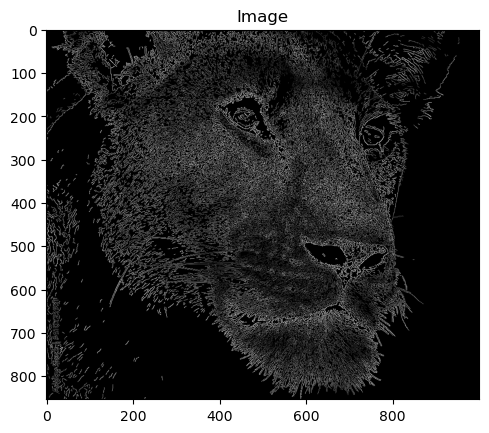

In [43]:
# Cartoon
# Convert the image to grayscale
img = cv2.imread('./images/lion.jpeg')
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply Canny edge detection
edges = cv2.Canny(grayscale_image, 100, 150)
# Dilate the edges
kernel = np.ones((1, 1), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)
# Invert the image
inverted_image = 255 - grayscale_image
# Combine the dilated edges with the inverted image
caricature = cv2.bitwise_and(dilated_edges, inverted_image)
show(caricature)